In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
import sys
sys.path.append("..")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
from probability.visualization import plot_covariance_ellipse
from helpers import vec

[[ 0.         -0.36180857  0.36180857  0.52354041 -0.52354041 -0.72361713
   0.72361713  1.04708082 -1.04708082]
 [ 0.          0.14986602 -0.14986602  1.26393836 -1.26393836  0.29973203
  -0.29973203  2.52787672 -2.52787672]]
[-2.08641975  0.61728395  0.61728395  0.61728395  0.61728395  0.15432099
  0.15432099  0.15432099  0.15432099]
[0.40733025 0.61728395 0.61728395 0.61728395 0.61728395 0.15432099
 0.15432099 0.15432099 0.15432099]


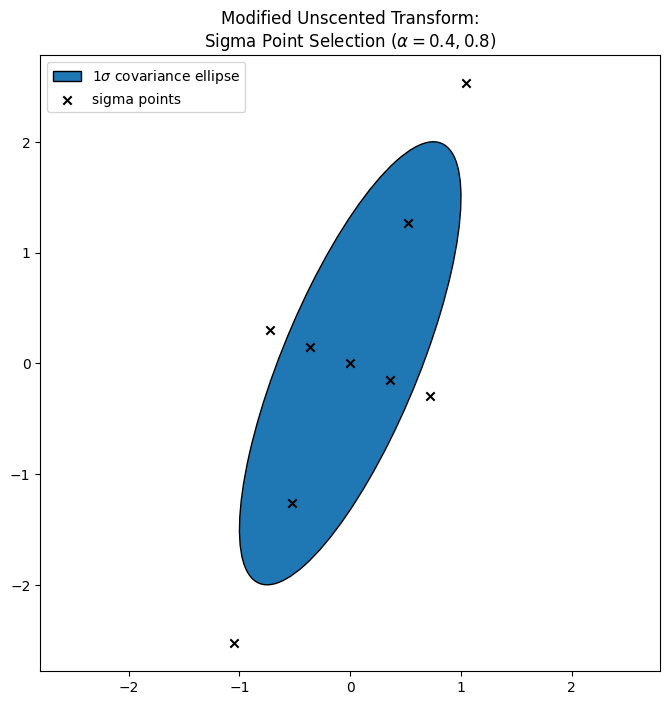

In [20]:
from probability.sigma_points import StandardSigmaPointSelector, MultiShellSigmaPointSelector
from probability.matrix_square_root import *

# selector = StandardSigmaPointSelector(alpha=0.3, mat_sqrt_alg=mat_sqrt_cholesky)
# selector = StandardSigmaPointSelector(alpha=0.5, mat_sqrt_alg=mat_sqrt_eigen)
selector = MultiShellSigmaPointSelector([0.45, 0.90], mat_sqrt_alg=mat_sqrt_eigen)

mean = vec(0, 0)
cov = np.array([
    [1.0, 1.5],
    [1.5, 4.0]
])

sigma_points, weights_mean, weights_cov = selector.select_sigma_points(mean, cov)
print(sigma_points)
print(weights_mean)
print(weights_cov)

plt.figure(figsize=(8, 8))

plt.title("Modified Unscented Transform:\nSigma Point Selection ($\\alpha = 0.4, 0.8$)")
plt.axis("equal")
plot_covariance_ellipse(plt.gca(), mean, cov, edgecolor="black", label="$1\sigma$ covariance ellipse")
plt.scatter(sigma_points[0], sigma_points[1], color="black", marker="x", label="sigma points")
plt.legend()

In [ ]:
mean_hat = np.sum(weights_mean * sigma_points)
cov_hat = weights_cov * (sigma_points - mean_hat) @ (sigma_points - mean_hat).T

print(mean_hat)
print(cov_hat)

-2.7755575615628914e-17
[[0.2 0.3]
 [0.3 0.8]]
